<a href="https://colab.research.google.com/github/PolinaKirillovna/data-analysis-labs/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B8%D1%86%D0%BA%D0%B0%D1%8F_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

6 1 8
3 1 -4
Решения данной системы уравнений x = 4.0; y = -16.0


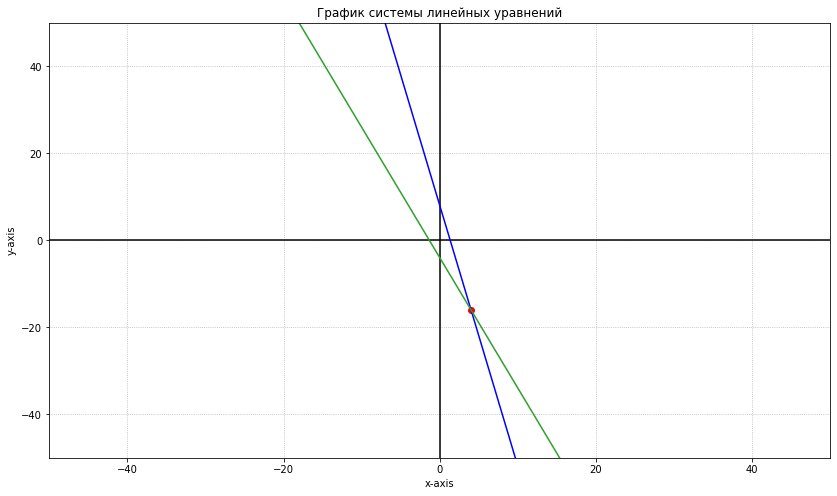

In [55]:
import numpy as np
import matplotlib.pyplot as plt

a11, a12 , b1 = map(int,(input().split()))
a21, a22 , b2 = map(int,(input().split()))

a = np.array([[a11, a12],[a21, a22]])
b = np.array([b1,b2])

flag = False

if (a11 / a12 == a21 / a22) and (b1 / a12 == b2 / a22):
  answer = ' Данная система уравнений имеет бесконечное множество решений'
elif (a11 / a12 == a21 / a22) and (b1 / a12 != b2 / a22):
  answer = 'Данная система уравнений не имеет решений'
else:
  z = np.linalg.solve(a, b)
  answer = f'Решения данной системы уравнений x = {z[0]}; y = {z[1]}'
  flag=True

plt.figure(figsize = (14, 8))

plt.xlim((-50,50))
plt.ylim((-50,50))

plt.plot([-50, 50], [0, 0], color='black')
plt.plot([0, 0], [-50, 50], color='black')

x = np.linspace(-50, 50)
y1 = b1/a12 - (a11*x)/a12
plt.plot(x, y1, color='blue')

y2 = b2/a22 - (a21*x)/a22
plt.plot(x, y2, color='C2')

plt.grid(True, linestyle =':')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

if flag == True:
  plt.scatter(z[0], z[1], marker='o', color='red')
plt.title('График системы линейных уравнений')
print(answer)
plt.show()


Для тестирования предлагается использовать следующие данные: 

Система уравнений имеет решения: 

6 1 8 \\
3 1 -4

Система уравнений не имеет решений: 

3 1 9 \\
3 1 -7

Система уравнений имеет бесконечное множество решений:

-6 4 2 \\
3 -2 -1

# Задание 2 (pytorch + matplotlib)


Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

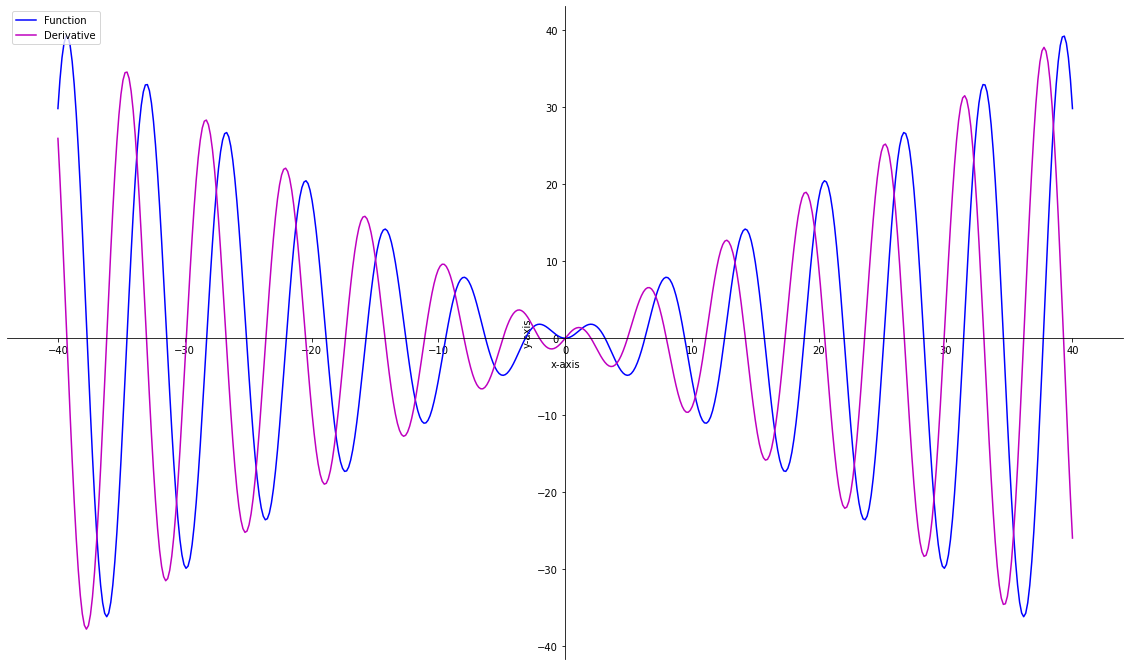

In [54]:
import matplotlib.pyplot as plt
import torch



x = torch.linspace(-40, 40, 500, requires_grad = True)
Y = torch.sin(x)*x
y = torch.sum(Y)
y.backward()

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.plot(x.detach().numpy(), Y.detach().numpy(),'b-', label = 'Function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(),'m-', label = 'Derivative')

plt.legend(loc='upper left')

plt.show()
